In [85]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_pickle("results.pkl")
df["wsp/point"] = df["wsp_count_2.0"] / df["num_points"]
df

,num_points,opt_len,nn_len,untouched_len,nwsp5_2_len,nwsp7_len,nwsp9_len,nwsp5_len,wsp_count_2.0,wsp/point
name,,,,,,,,,,
berlin52,52,7544.365902,9194.130643,10818.833107,22846.619539,NaN,NaN,11728.735582,376,7.230769
bier127,127,NaN,139602.236419,173055.130034,314224.537324,NaN,NaN,NaN,1129,8.889764
brd14051,14051,NaN,575718.536949,837139.548800,NaN,NaN,NaN,NaN,<NA>,<NA>
ch130,130,6110.860950,7378.680775,10043.991903,20993.789501,NaN,NaN,17099.212197,1097,8.438462
ch150,150,6532.280933,7982.489176,10882.863400,29154.866635,NaN,NaN,29705.180285,1402,9.346667
...,...,...,...,...,...,...,...,...,...,...
xqc2175,2175,6953.194492,8863.970176,13835.784078,NaN,NaN,NaN,NaN,24447,11.24
xqd4966,4966,NaN,20226.325007,81824.274755,NaN,NaN,NaN,NaN,287471,57.887837
xqe3891,3891,NaN,14964.310287,22318.421062,NaN,NaN,NaN,NaN,42097,10.81907


59


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          wsp_count_2.0   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              1228.
Date:                Sun, 31 Dec 2023   Prob (F-statistic):                    9.99e-41
Time:                        10:47:06   Log-Likelihood:                         -628.59
No. Observations:                  59   AIC:                                      1259.
Df Residuals:                      58   BIC:                                      1261.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
num_points    14.7100      0.420     35.043      0.000      13.870      15.550
==============================================================================
Omnibus:                       69.092   Durbin-Watson:                   2.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              703.898
Skew:                           3.128   Prob(JB):                    1.41e-153
Kurtosis:                      18.722   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

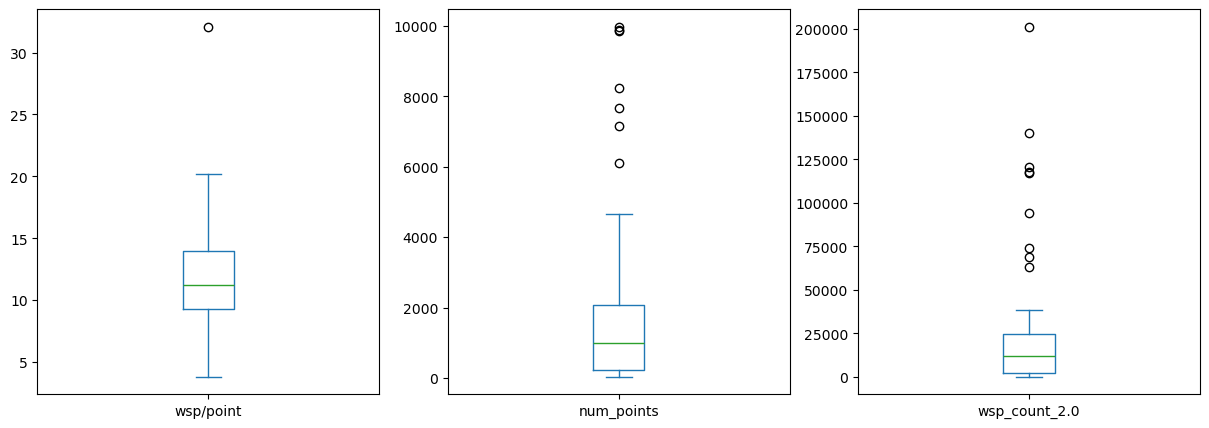

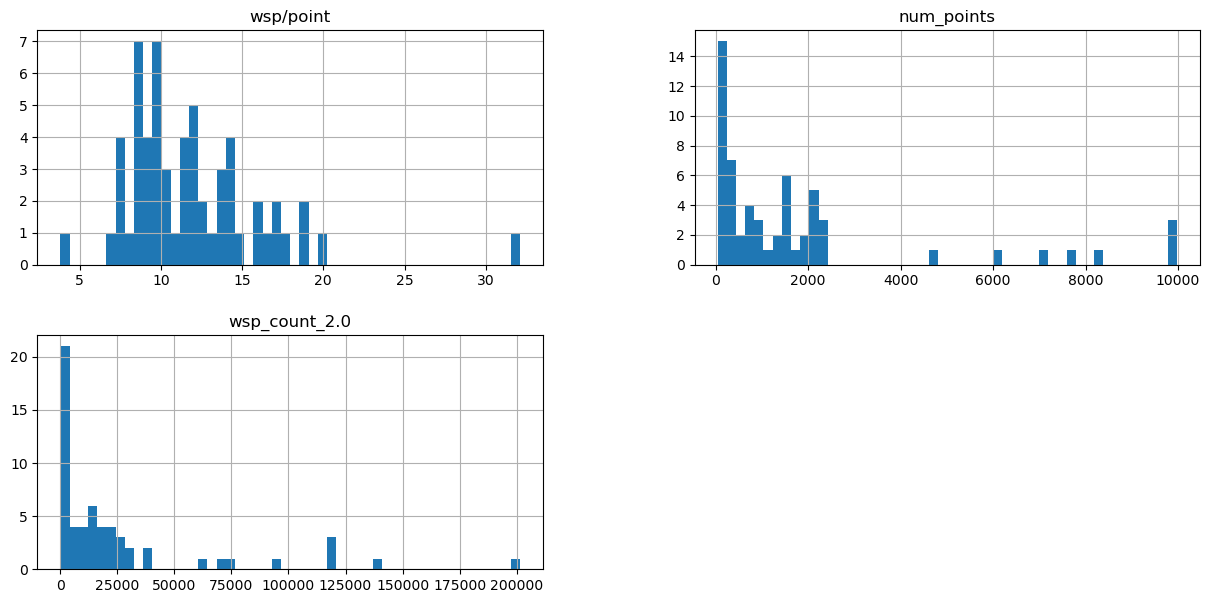

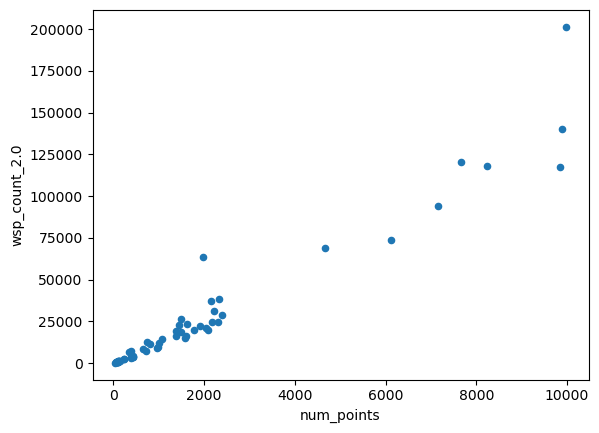

In [97]:
# Remove NAN wsp_counts and tell cells their format
df = df[~df['wsp_count_2.0'].isna()]
print(len(df))

fig, axs = plt.subplots(1,3, figsize=(15,5))
df["wsp/point"].plot.box(ax=axs[0])
df["num_points"].plot.box(ax=axs[1])
df["wsp_count_2.0"].plot.box(ax=axs[2])

df.hist(column=["wsp/point", "num_points", "wsp_count_2.0"], bins=50, figsize=(15,7))

df.plot.scatter("num_points", "wsp_count_2.0")

results = sm.OLS(df["wsp_count_2.0"].astype(int), df["num_points"]).fit()
results.summary()

In [98]:
df = df[~df['opt_len'].isna()] # remove problems without optimal lens

In [99]:
df["nn error"] = df["nn_len"] / df["opt_len"]
print(len(df))
df

59


,num_points,opt_len,nn_len,untouched_len,nwsp5_2_len,nwsp7_len,nwsp9_len,nwsp5_len,wsp_count_2.0,wsp/point,nn error
name,,,,,,,,,,,
berlin52,52,7.544366e+03,9.194131e+03,1.081883e+04,2.284662e+04,NaN,NaN,1.172874e+04,376,7.230769,1.218675
ch130,130,6.110861e+03,7.378681e+03,1.004399e+04,2.099379e+04,NaN,NaN,1.709921e+04,1097,8.438462,1.207470
ch150,150,6.532281e+03,7.982489e+03,1.088286e+04,2.915487e+04,NaN,NaN,2.970518e+04,1402,9.346667,1.222006
eil101,101,6.423095e+02,8.626816e+02,9.399822e+02,1.787076e+03,NaN,NaN,1.296031e+03,1171,11.594059,1.343093
eil51,51,4.299833e+02,5.906740e+02,5.629952e+02,8.002376e+02,NaN,NaN,8.951434e+02,360,7.058824,1.373714
eil76,76,5.453876e+02,7.077517e+02,7.905928e+02,8.228328e+02,NaN,NaN,9.371500e+02,761,10.013158,1.297704
kroA100,100,2.128544e+04,2.738545e+04,3.907653e+04,6.063261e+04,NaN,NaN,4.550216e+04,792,7.92,1.286581
kroC100,100,2.075076e+04,2.882035e+04,3.832075e+04,5.917176e+04,NaN,NaN,6.335599e+04,728,7.28,1.388882
kroD100,100,2.129429e+04,2.742850e+04,4.028149e+04,5.890908e+04,NaN,NaN,8.670203e+04,930,9.3,1.288068


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               nn error   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              453.9
Date:                Sun, 31 Dec 2023   Prob (F-statistic):                    4.14e-29
Time:                        10:48:04   Log-Likelihood:                         -33.440
No. Observations:                  59   AIC:                                      68.88
Df Residuals:                      58   BIC:                                      70.96
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wsp/point      0.0942      0.004     21.305      0.000       0.085       0.103
==============================================================================
Omnibus:                       40.061   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.342
Skew:                          -1.927   Prob(JB):                     1.11e-29
Kurtosis:                       9.276   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

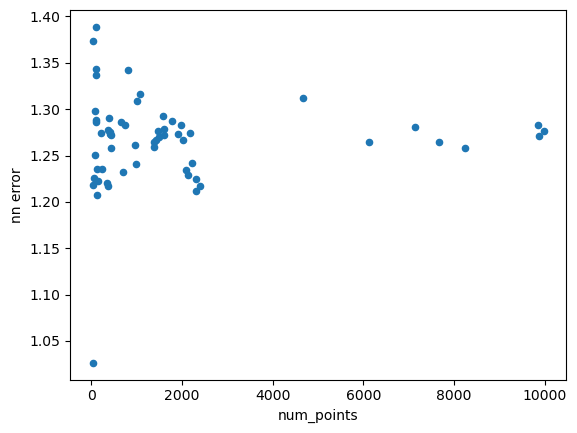

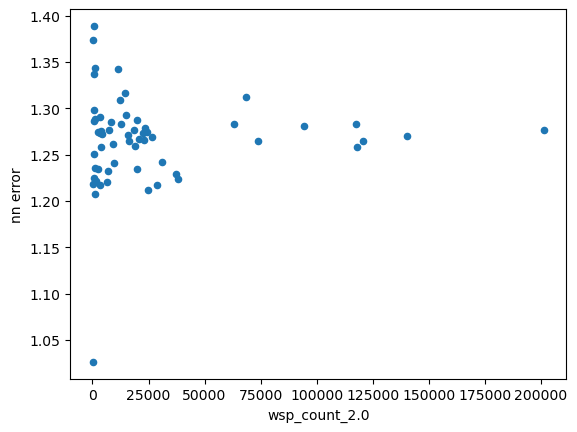

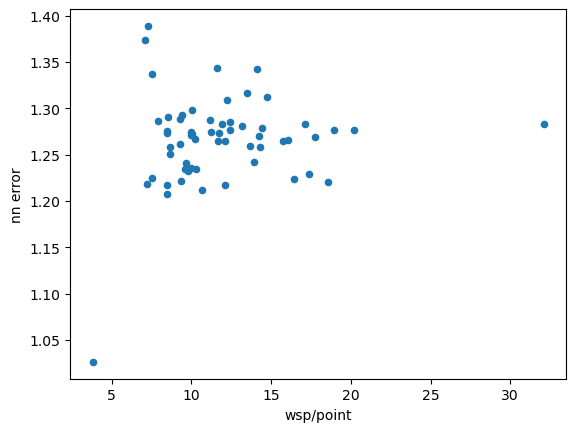

In [100]:
df.plot.scatter("num_points", "nn error")
df.plot.scatter("wsp_count_2.0", "nn error")
df.plot.scatter("wsp/point", "nn error")

results = sm.OLS(df["nn error"].astype(float), df["wsp/point"].astype(float)).fit()
results.summary()